In [1]:
# ASTR 512: Problem Set #1
# N. Nicole Sanchez
# University of Washington, Seattle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.set_style({'font.family': [u'serif']},{'text.size': '.3'})
#plt.rc('font',size=14,family='serif',style='normal',
       #variant='normal',stretch='normal',weight='normal')
%matplotlib inline

In [2]:
# Part c:
# Classifying Galaxies

<img src="./NGC_151_MCG_-2_2_54_IRAS_00315-0958_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_309_MCG_-2_3_50_IRAS_00542-1010_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_741_UGC_1413_3ZW_38_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_1032_UGC_2147_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_2681_UGC_4645_ARAK_185_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_2775_UGC_4820_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_2859_UGC_5001_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3023_UGC_5269_IRAS_09472+0051_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3338_UGC_5826_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_7814_UGC_8_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3310_UGC_5786_ARP_217_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_3319_UGC_5789_KUG_1036+419_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3351_UGC_5850_IRAS_10413+1158_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_3379_UGC_5902_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3384_UGC_5911_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3396_UGC_5935_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3433_UGC_5981_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3489_UGC_6082_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3608_UGC_6299_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3627_UGC_6346_ARAK_288_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3631_UGC_6360_ARP_27_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_3666_UGC_6420_IRAS_11218+1137_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3675_UGC_6439_irg.jpg" style="width:3cm;display:inline;margin:1px"> 
<img src="./NGC_3692_UGC_6474_IRAS_11258+0940_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3801_UGC_6635_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3938_UGC_6856_IRAS_11502+4423_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_3941_UGC_6857_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_4026_UGC_6985_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_4203_UGC_7256_IRAS_12125+3328_irg.jpg" style="width:3cm;display:inline;margin:1px">
<img src="./NGC_4570_UGC_7785_VCC_1692_irg.jpg" style="width:3cm;display:inline;margin:1px">

In [3]:
# Galaxy Classifications Dataframe
Label = ['NGC_151','NGC_309','NGC_741','NGC_1032','NGC_2681','NGC_2775','NGC_2859',
         'NGC_3023','NGC_3338','NGC_7814','NGC_3310','NGC_3319','NGC_3351','NGC_3379',
         'NGC_3384','NGC_3396','NGC_3433','NGC_3489','NGC_3608','NGC_3627','NGC_3631',
         'NGC_3666','NGC_3675','NGC_3692','NGC_3801','NGC_3938','NGC_3941','NGC_4026',
         'NGC_4203','UGC_4570']
Obs  = ['SBa', 'SBc', 'E1', 'Sb', 'S0a','E2', 'S0a', 'Im', 'Sc', 'Sb','Sd','SBm','S0a',
        'E0','E4','Im','Sc','E5','E2','SBc','Sc','Sb','S0p','Sa','E3','Sb','E3','E7',
        'E0','E7']
Tobs = [1,3,-4,3,0,-4,0,10,5,3,7,9,0,-5,-4,11,5,-4,-4,5,5,3,-1,1,-4,3,-4,-4,-5,-4]

Tru  = ['SBbc','SBc','E0','S0a','SB0a','Sab','SB0p','SBc','Sc','Sab','SBbc',
        'SBcd','SBb','E1','SB0m','Im','Sc','SB0p','E2','SBb','Sc','Sc','Sb','Sb',
        'S0','Sc','SB0','S0','SB0m','S0']

Ttru = [4,5,-5,0,0,2,-1,5,5,2,4,6,3,-4,-3,11,5,-1,-4,3,5,5,3,3,-2,5,-2,-2,-3,-2]

df = pd.DataFrame({'Name':Label,'Obs_Class':Obs,'Obs_Ttype':Tobs,
                   'True_Class':Tru,'True_Ttype':Ttru})
print(df)

        Name Obs_Class  Obs_Ttype True_Class  True_Ttype
0    NGC_151       SBa          1       SBbc           4
1    NGC_309       SBc          3        SBc           5
2    NGC_741        E1         -4         E0          -5
3   NGC_1032        Sb          3        S0a           0
4   NGC_2681       S0a          0       SB0a           0
5   NGC_2775        E2         -4        Sab           2
6   NGC_2859       S0a          0       SB0p          -1
7   NGC_3023        Im         10        SBc           5
8   NGC_3338        Sc          5         Sc           5
9   NGC_7814        Sb          3        Sab           2
10  NGC_3310        Sd          7       SBbc           4
11  NGC_3319       SBm          9       SBcd           6
12  NGC_3351       S0a          0        SBb           3
13  NGC_3379        E0         -5         E1          -4
14  NGC_3384        E4         -4       SB0m          -3
15  NGC_3396        Im         11         Im          11
16  NGC_3433        Sc         

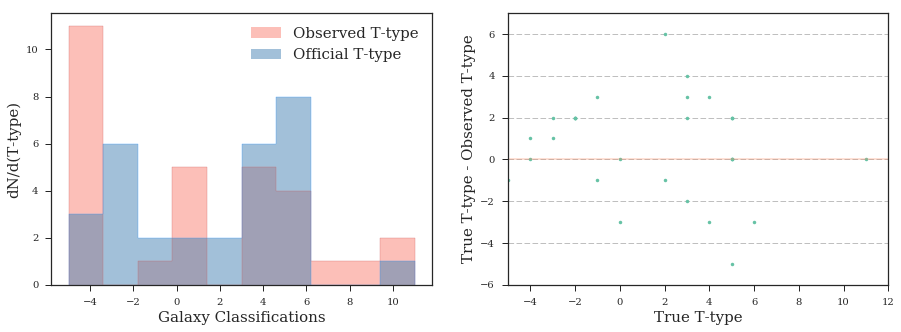

In [4]:
# Classification Histogram: Observed (by me) vs. Official/True T-type
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df.Obs_Ttype,color='Salmon',alpha=0.5,label='Observed T-type')
ax1.hist(df.True_Ttype,color='SteelBlue',alpha=0.5,label='Official T-type')
ax1.legend(fontsize=15)
ax1.hist(df.Obs_Ttype,color='IndianRed',histtype='step')
ax1.hist(df.True_Ttype,color='DodgerBlue',histtype='step')
ax1.set_xlabel('Galaxy Classifications',size=15)
ax1.set_ylabel('dN/d(T-type)',size=15)

ax2.plot(df.True_Ttype,(df.True_Ttype-df.Obs_Ttype),'.')
ax2.plot([-15,15],[0,0],alpha=0.3)
ax2.set_xlim(-5,12)
ax2.set_ylim(-6,7)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed',alpha=0.5)
ax2.set_ylabel('True T-type - Observed T-type',size=15)
ax2.set_xlabel('True T-type',size=15)
plt.savefig('gxy_class_hist.pdf')

Biases: My classifications tended to trend as Elliptical galaxies. When the official classification was often closer to an S0/a or S0$^{+/-}$, I would be more likely to classify it as an Elliptical galaxy. I also classified my spiral galaxies more broadly, more often classifying them as c/d than the official classifications.

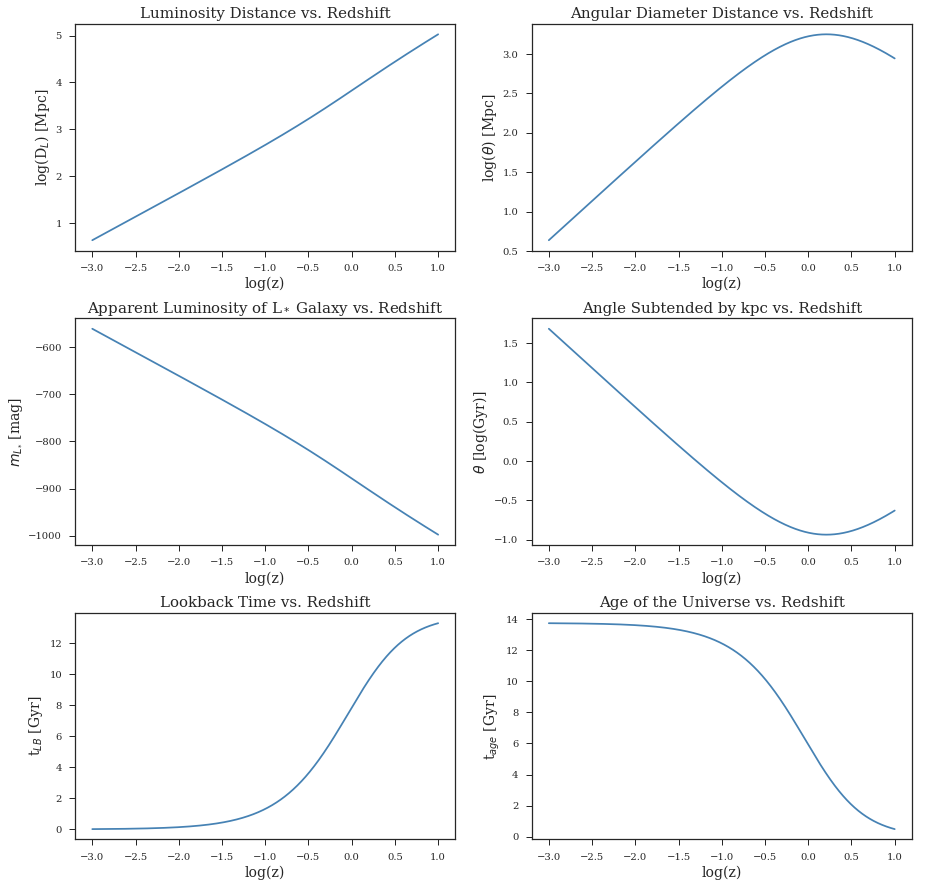

In [5]:
# Part d:
# Extragalactic Scales
from astropy.cosmology import WMAP9 as cosmo
z = np.logspace(-3.,1,1000)
#print(z)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

plt.subplots_adjust(hspace = 0.3)

# Plot Luminosity Distance
L_dist = cosmo.luminosity_distance(z)
#print(L_dist)

ax1.plot(np.log10(z),np.log10(L_dist.value),color='SteelBlue')
ax1.set_title('Luminosity Distance vs. Redshift',size=15)
ax1.set_ylabel(r'log(D$_L$) [Mpc]',size=14)
ax1.set_xlabel('log(z)',size=14)

# Plot Angular Diameter Distance
Ang_diam_dist = cosmo.angular_diameter_distance(z)
#print(Ang_diam_dist)

ax2.plot(np.log10(z),np.log10(Ang_diam_dist.value),color='SteelBlue')
ax2.set_title('Angular Diameter Distance vs. Redshift',size=15)
ax2.set_ylabel(r'log($\theta$) [Mpc]',size=14)
ax2.set_xlabel('log(z)',size=14)

# Plot Apparent Magnitude of L_star Galaxy
# Ignore k-corrections
MWmag    = -20.9
dist_mod = cosmo.distmod(z)
M_app    = MWmag * dist_mod.value + dist_mod.value

ax3.plot(np.log10(z),M_app,color='SteelBlue')
ax3.set_title('Apparent Luminosity of L$_*$ Galaxy vs. Redshift',size=15)
ax3.set_ylabel(r'$m_{L_{*}}$ [mag]',size=14)
#ax3.ticklabel_format(axis='x', style='plain')
ax3.set_xlabel('log(z)',size=14)

# Plot angle (in arcsecs) subtended by 1 kpc
#def ang_subtended_by_1kpc(z):
#    c_H0 = 3000 # c/H0 [Mpc/h]
#    d    = 10.**-3   # kpc
#    theta = d*(1+z)/(2*c_H0*(1-(1+z)**-0.5))
#    return theta

ang_kpc = cosmo.arcsec_per_kpc_proper(z)
#print(ang_kpc)

ax4.plot(np.log10(z),np.log10(ang_kpc.value),color='SteelBlue')
ax4.set_title('Angle Subtended by kpc vs. Redshift',size=15)
ax4.set_ylabel(r'$\theta$ [log(Gyr)]',size=14)
ax4.set_xlabel('log(z)',size=14)

# Plot Lookback Time
t_LB = cosmo.lookback_time(z)
#print(LB_dist)

ax5.plot(np.log10(z),t_LB.value,color='SteelBlue')
ax5.set_title('Lookback Time vs. Redshift',size=15)
ax5.set_ylabel(r't$_{LB}$ [Gyr]',size=14)
ax5.set_xlabel('log(z)',size=14)

# Plot Age of the Universe
t_universe = cosmo.age(z)
#print(t_universe)

ax6.plot(np.log10(z),t_universe.value,color='SteelBlue')
ax6.set_title('Age of the Universe vs. Redshift',size=15)
ax6.set_ylabel(r't$_{age}$ [Gyr]',size=14)
ax6.set_xlabel('log(z)',size=14)
#fig.tight_layout()
plt.savefig('xtrgxy_scales.pdf')

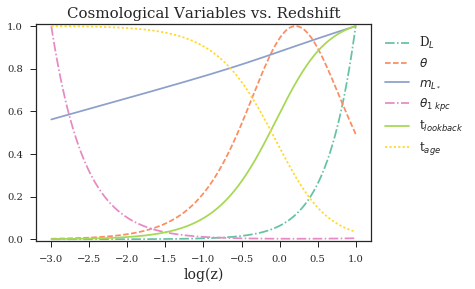

In [6]:
# Plot Luminosity Distance
plt.plot(np.log10(z),L_dist.value/max(L_dist.value),label=r'D$_L$',linestyle='-.')

# Plot Angular Diameter Distance
plt.plot(np.log10(z),Ang_diam_dist.value/max(Ang_diam_dist.value),
         label=r'$\theta$',linestyle='--')

# Plot Apparent Magnitude of L_star Galaxy
plt.plot(np.log10(z),M_app/min(M_app),label=r'$m_{L_*}$')

# Plot angle (in arcsecs) subtended by 1 kpc
plt.plot(np.log10(z),(ang_kpc.value/max(ang_kpc.value)),
         label=r'$\theta_{1\ kpc}$',linestyle='-.')

# Plot Lookback Time
plt.plot(np.log10(z),t_LB.value/max(t_LB.value),label=r't$_{lookback}$',linestyle='-')

# Plot Age of the Universe
plt.plot(np.log10(z),t_universe.value/max(t_universe.value),label=r't$_{age}$',linestyle=':')

plt.title('Cosmological Variables vs. Redshift',size=15)
plt.xlabel('log(z)',size=14)
plt.legend(fontsize=12, bbox_to_anchor=(1.01, 1.0),
          fancybox=True, shadow=True)
plt.ylim(-0.01,1.01)
plt.savefig('xtrgxy_scales2.pdf')